In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from log_fit import main_log_fit

Text(0, 0.5, 'a.u.')

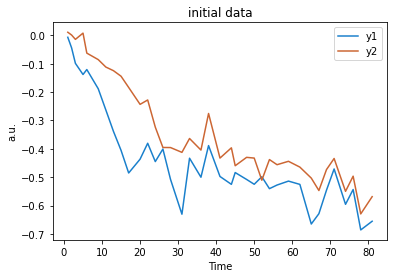

In [2]:
# example data - behavioral learning curves
x = np.array([1,  2,  3,  5,  6,  9, 11, 13, 15, 17, 20, 22, 24, 26, 28, 31, 33,
        36, 38, 41, 44, 45, 48, 50, 52, 54, 56, 59, 62, 65, 67, 69, 71, 74,
        76, 78, 81])
y1 = np.array([-0.00698672, -0.04427114, -0.09882686, -0.13813976, -0.12068359,
       -0.18832691, -0.26316037, -0.33850416, -0.40550298, -0.48521544,
       -0.4365038 , -0.38045521, -0.44502602, -0.40081287, -0.50764598,
       -0.63046217, -0.43313226, -0.50012349, -0.3886516 , -0.49750134,
       -0.52523494, -0.4836726 , -0.50798179, -0.5249963 , -0.49852032,
       -0.54043761, -0.52767441, -0.51379463, -0.52537898, -0.66500499,
       -0.62865624, -0.5456704 , -0.47104094, -0.59561552, -0.54347611,
       -0.68582847, -0.65524236])
y2 = np.array([ 0.01076883,  0.00098467, -0.01434434,  0.00766159, -0.06281212,
       -0.08565951, -0.1118847 , -0.12465605, -0.14426234, -0.1837222 ,
       -0.24336156, -0.22791681, -0.32368865, -0.3952908 , -0.39559051,
       -0.41252718, -0.36366828, -0.40446798, -0.27554978, -0.43268852,
       -0.3965363 , -0.45964324, -0.43009814, -0.43267519, -0.51070861,
       -0.43791064, -0.45602741, -0.44402021, -0.46450149, -0.50325972,
       -0.54698632, -0.47310596, -0.43415405, -0.5498987 , -0.49645438,
       -0.62940432, -0.56862506])

ys = [y1, y2]

# show data
clrs = [(.1, .5, .8), (.8, .4, .2)]
names = ['y1', 'y2']

for iy, y in enumerate(ys):
       plt.plot(x, y, color=clrs[iy])
plt.title('initial data')
plt.legend(names)
plt.xlabel('Time')
plt.ylabel('a.u.')

In [3]:
# calculate model fits

results_y1 = main_log_fit(x, y1) # run without permutation test
results_y2 = main_log_fit(x, y2) # run without permutation test
results_y1 = main_log_fit(x, y1, to_perm_test=True, Nsim=1000) # run with permutation test
results_y2 = main_log_fit(x, y2, to_perm_test=True, Nsim=1000) # run with permutation test
    # Nsim=100 takes ~30s each
    # Nsim=1000 takes ~4 mins each


Perm test is selected
Simulation 0


/home/arielle/miniconda3/envs/spyderenv/lib/python3.8/site-packages/scipy/stats/stats.py:4196: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/mnt/tambinidata/ScanTrain/analysis/log_fit.py:29: RuntimeWarning: overflow encountered in exp
  return b + ( l/(1 + np.exp(-k * (x-c))) )


Simulation 100
Simulation 200
Simulation 300
Simulation 400
Simulation 500
Simulation 600
Simulation 700
Simulation 800
Simulation 900
Perm test is selected
Simulation 0
Simulation 100
Simulation 200
Simulation 300
Simulation 400
Simulation 500
Simulation 600
Simulation 700
Simulation 800
Simulation 900


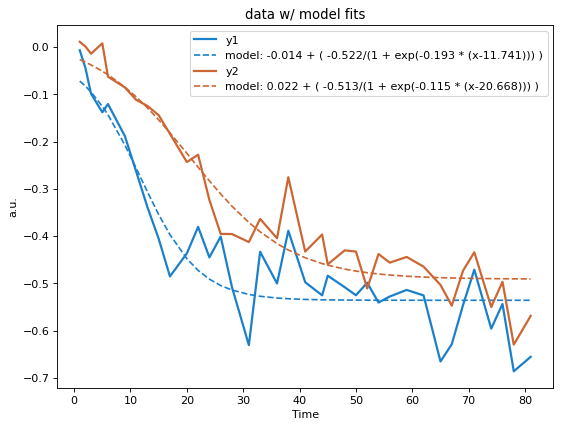

In [4]:
# show model fits
results = [results_y1, results_y2]

plt.figure(figsize=(8, 6), dpi=80)
legend = []
for iy, y in enumerate(ys):
    plt.plot(x, y, color=clrs[iy], linewidth=2)
    plt.plot(x, results[iy].y_predict, color=clrs[iy], linestyle='--')
    legend.append(names[iy])
    legend.append('model: {} + ( {}/(1 + exp(-{} * (x-{}))) )'.format(\
        round(results[iy].y_init,3), round(results[iy].y_final,3), \
        round(results[iy].k,3), round(results[iy].x,3)))

plt.xlabel('Time')
plt.ylabel('a.u.')
plt.title('data w/ model fits')
plt.legend(legend)

In [5]:
# display information about model fits
for ires, res in enumerate(results):
    print(names[ires] + ' Model parameters:----------------------')
    print('Inflection point (x): ' + str(res.x))
    print('Slope (k): ' + str(res.k))
    print('Y-change: ' + str(res.y_change))
    print('Y-initial value: ' + str(res.y_init))
    print('Y-final value: ' + str(res.y_final))
    print('')
    print(names[ires] + ' Model fit information:--------------------')
    print('Rank Correl. btwn predicted & true y-vaules (r): ' + str(res.stats_r))
    print('Rank Correl. btwn predicted & true y-vaules (Pvalue-Parametric): ' + str(res.stats_Ppara))
    if 'stats_Pperm' in dir(res):
        print('Rank Correl. btwn predicted & true y-vaules (Pvalue-Permutation): ' + str(res.stats_Pperm))
    print('')

y1 Model parameters:----------------------
Inflection point (x): 11.7409614078782
Slope (k): 0.19319319734114448
Y-change: -0.5077027243186445
Y-initial value: -0.013973440000000002
Y-final value: -0.5216761643186445

y1 Model fit information:--------------------
Rank Correl. btwn predicted & true y-vaules (r): 0.8748221906116643
Rank Correl. btwn predicted & true y-vaules (Pvalue-Parametric): 7.308912995459124e-13
Rank Correl. btwn predicted & true y-vaules (Pvalue-Permutation): 0.0

y2 Model parameters:----------------------
Inflection point (x): 20.668414070395368
Slope (k): 0.11483924427180772
Y-change: -0.5340722616114987
Y-initial value: 0.021537659999999997
Y-final value: -0.5125346016114987

y2 Model fit information:--------------------
Rank Correl. btwn predicted & true y-vaules (r): 0.9618302513039355
Rank Correl. btwn predicted & true y-vaules (Pvalue-Parametric): 1.3912122727805868e-21
Rank Correl. btwn predicted & true y-vaules (Pvalue-Permutation): 0.0

